In [1]:
from sympy import symbols, integrate, cos, sin, pi

In [2]:
# Define the variables.
theta, phi = symbols('theta phi')
alpha, E_cm = symbols('alpha E_cm')

# Define the differential cross-section per unit solid angle.
d_sigma_d_Omega = (alpha**2 / (4 * E_cm**2)) * (1 + cos(theta)**2)

# Expression for the solid angle element.
d_Omega = sin(theta)

# Integrate over theta from 0 to pi and phi from 0 to 2*pi.
sigma_total = integrate(d_sigma_d_Omega * d_Omega, (theta, 0, pi), (phi, 0, 2*pi))
sigma_total.simplify()

4*pi*alpha**2/(3*E_cm**2)

In [6]:
initial_expr = d_sigma_d_Omega * d_Omega
initial_expr

alpha**2*(cos(theta)**2 + 1)*sin(theta)/(4*E_cm**2)

In [5]:
initial_expr.simplify()

alpha**2*(cos(theta)**2 + 1)*sin(theta)/(4*E_cm**2)

# Propagators

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

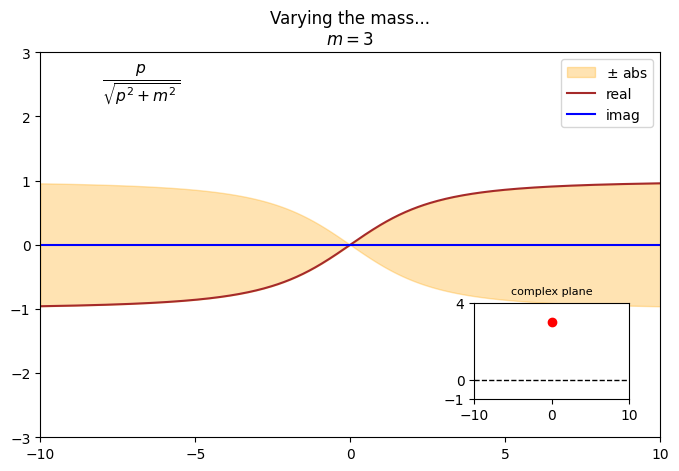

In [34]:
# Define the function with varying mass parameter m.
def f(p, m):
    return p / np.sqrt(p**2 + m**2)

# Set the range for p and mass m
p_values = np.linspace(-10, 10, 400)
m = 3  # Mass parameter as seen in the figure

# Compute the real, imaginary, and absolute values
real_part = np.real(f(p_values, m))
imag_part = np.imag(f(p_values, m))
abs_value = np.abs(f(p_values, m))

# Create the main plot.
fig, ax = plt.subplots(figsize=(8, 5))
ax.fill_between(p_values, -abs_value, abs_value, color='orange', alpha=0.3, label=r'$\pm$ abs')
ax.plot(p_values, real_part, color='brown', label='real')
ax.plot(p_values, imag_part, color='blue', label='imag')

# Labels and title.
ax.set_xlim(-10, 10)
ax.set_ylim(-3, 3)
ax.set_xticks(np.linspace(-10, 10, 5))
ax.set_yticks(np.linspace(-3, 3, 7))
ax.set_title('Varying the mass...\n$m = 3$')
ax.text(-8, 2.5, r'$\frac{p}{\sqrt{p^2 + m^2}}$', fontsize=16)

# Add legend.
ax.legend(loc="upper right")

# Inset for complex plane.
inset_ax = ax.inset_axes([0.7, 0.1, 0.25, 0.25])
inset_ax.axhline(0, color='black', linestyle='--', linewidth=1)
inset_ax.plot(0, m, 'ro', markersize=6, label='m')    
inset_ax.set_xlim(-10, 10)
inset_ax.set_ylim(-1, 4)
inset_ax.set_xticks([-10, 0, 10])
inset_ax.set_yticks([-1, 0, 4])
inset_ax.set_title("complex plane", fontsize=8)

# Display the plot.
plt.show()

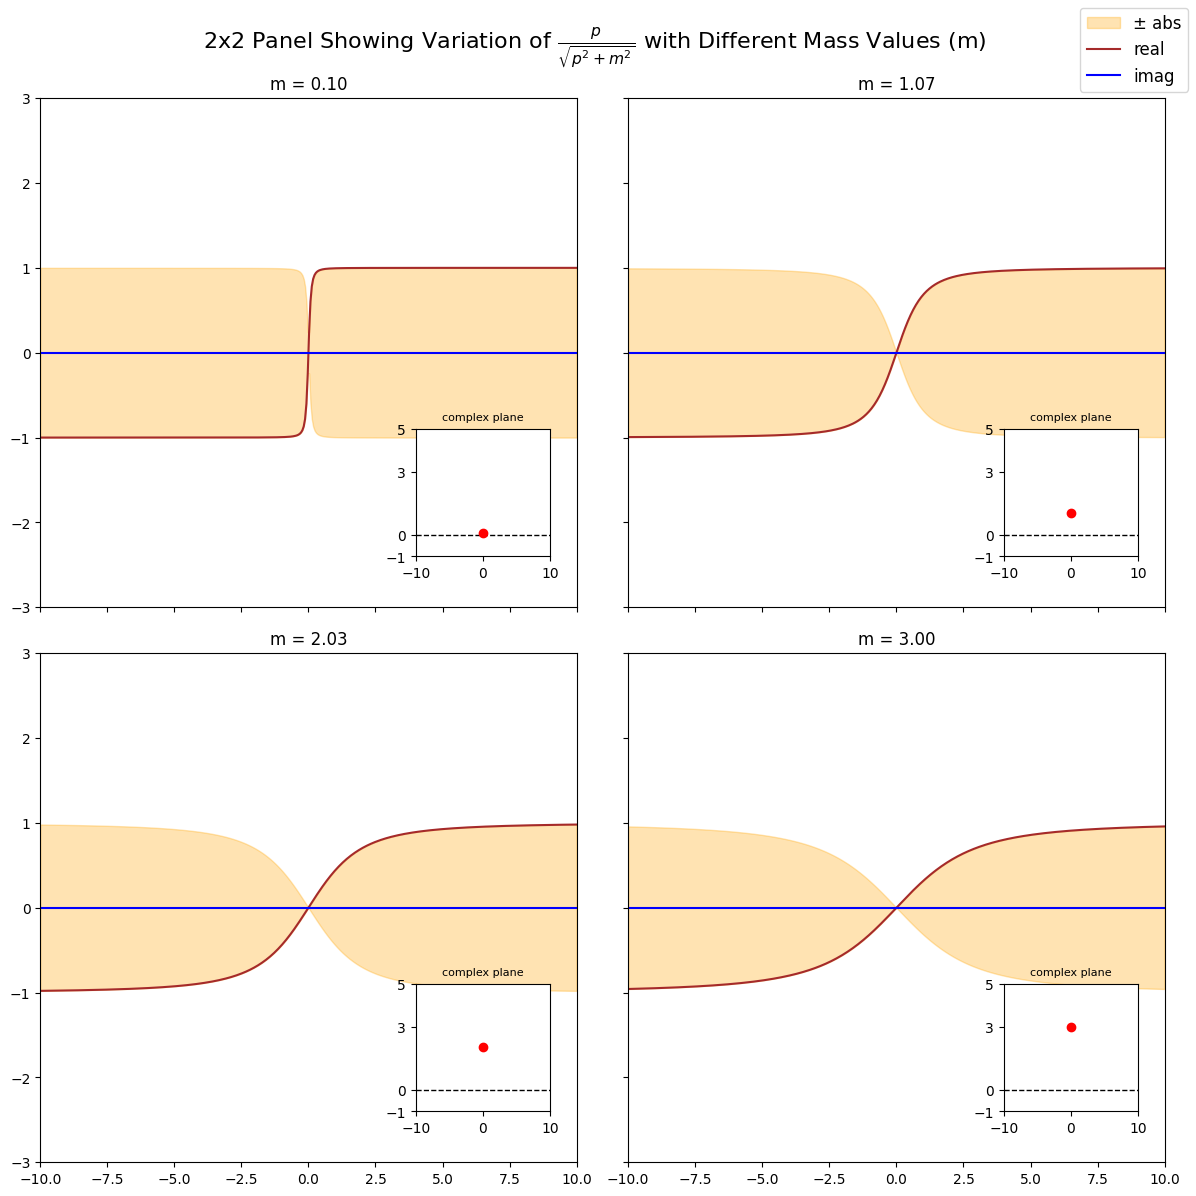

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True, sharey=True)

# Initialize an empty list to store handles for the legend
handles = []

# Plot for each m in the 4x4 grid
for i, ax in enumerate(axes.flat):
    m = m_values[i]
    real_part = np.real(f(p_values, m))
    imag_part = np.imag(f(p_values, m))
    abs_value = np.abs(f(p_values, m))
    
    # Fill the absolute value area and capture the handle for the legend
    fill_handle = ax.fill_between(p_values, -abs_value, abs_value, color='orange', alpha=0.3, label="± abs")
    line_real, = ax.plot(p_values, real_part, color='brown', label="real")
    line_imag, = ax.plot(p_values, imag_part, color='blue', label="imag")
    
    # Add handles only for the first plot to avoid duplicates in the legend
    if i == 0:
        handles.extend([fill_handle, line_real, line_imag])
    
    # Set title for each subplot
    ax.set_title(f"m = {m:.2f}")
    ax.set_xlim(-10, 10)
    ax.set_ylim(-3, 3)
    
    
    # Inset for complex plane with red dot at the value of m on the real line
    inset_ax = ax.inset_axes([0.7, 0.1, 0.25, 0.25])
    inset_ax.axhline(0, color='black', linestyle='--', linewidth=1)
    
    # Plot the red dot at (m, 0) to represent the mass value on the real axis
    inset_ax.plot(0, m, 'ro', markersize=6, label='m')
    
    inset_ax.set_xlim(-10, 10)
    inset_ax.set_ylim(-1, 5)
    inset_ax.set_xticks([-10, 0, 10])
    inset_ax.set_yticks([-1, 0, 3, 5])
    inset_ax.set_title('complex plane', fontsize=8)

# Add a single legend outside the grid
fig.legend(handles=handles, loc='upper right', fontsize=12)
fig.suptitle('2x2 Panel Showing Variation of $\\frac{p}{\\sqrt{p^2 + m^2}}$ with Different Mass Values (m)', fontsize=16)

plt.tight_layout() #rect=[0, 0, 1, 0.96])
plt.show()

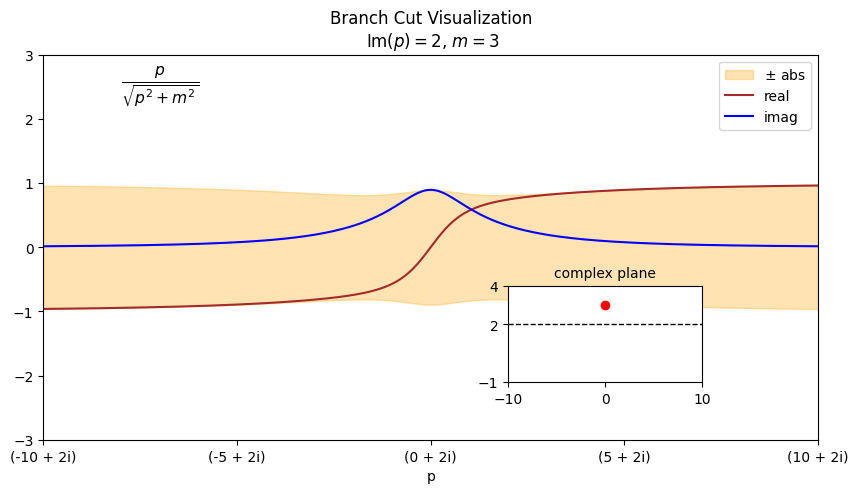

In [16]:
# Define the function with complex p values and fixed imaginary part Im(p) = 2
def complex_f(p, m):
    return p / np.sqrt(p**2 + m**2)

# Set parameters
m = 3  # Example mass value
p_real_values = np.linspace(-10, 10, 400)  # Real part of p ranging from -10 to 10
p_values = p_real_values + 2j  # Complex p values with Im(p) = 2

# Compute function values
real_part = np.real(complex_f(p_values, m))
imag_part = np.imag(complex_f(p_values, m))
abs_value = np.abs(complex_f(p_values, m))

# Create the main plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.fill_between(p_real_values, -abs_value, abs_value, color='orange', alpha=0.3, label=r'$\pm$ abs')
ax.plot(p_real_values, real_part, color='brown', label="real")
ax.plot(p_real_values, imag_part, color='blue', label="imag")

# Set x and y limits
ax.set_xlim(-10, 10)
ax.set_ylim(-3, 3)

# Label and titles
ax.set_xlabel('p')

# Custom x-tick labels for complex notation
p_tick_values = np.linspace(-10, 10, 5)
p_tick_labels = [f"({int(val)} + 2i)" for val in p_tick_values]
ax.set_xticks(p_tick_values)
ax.set_xticklabels(p_tick_labels)
#ax.set_xticks(np.linspace(-10, 10, 5))

ax.set_yticks(np.linspace(-3, 3, 7))
ax.set_title("Branch Cut Visualization\n $\\operatorname{Im}(p) = 2$, $m = 3$")
ax.text(-8, 2.5, r"$\frac{p}{\sqrt{p^2 + m^2}}$", fontsize=16)
ax.legend(loc="upper right")

# Inset for complex plane
inset_ax = ax.inset_axes([0.6, 0.15, 0.25, 0.25])
inset_ax.axhline(2, color='black', linestyle='--', linewidth=1)
inset_ax.plot(0, m, 'ro', markersize=6, label='m')
inset_ax.set_xlim(-10, 10)
inset_ax.set_ylim(-1, 4)
inset_ax.set_xticks([-10, 0, 10])
inset_ax.set_yticks([-1, 2, 4])
inset_ax.set_title("complex plane", fontsize=10)

plt.show()

In [17]:
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Parameters for animation
m = 1  # Mass parameter
p_real_values = np.linspace(-10, 10, 400)  # Real part of p
imag_values = np.linspace(0, 2, 60)  # Imaginary part varying from 0 to 2 over 60 frames

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(-10, 10)
ax.set_ylim(-3, 3)
ax.set_xlabel('p')
ax.set_ylabel('Function values')
ax.set_title(f'Branch Cut Animation\n $m = {m}$')
ax.text(-8, 2.5, r"$\frac{p}{\sqrt{p^2 + m^2}}$", fontsize=16)

# Custom x-tick labels for complex notation
p_tick_values = np.linspace(-10, 10, 5)
p_tick_labels = [f"({int(val)} + {{}}i)" for val in p_tick_values]
ax.set_xticks(p_tick_values)

# Plot initial setup
real_line, = ax.plot([], [], color='brown', label="real")
imag_line, = ax.plot([], [], color='blue', label="imag")
abs_fill = Polygon(np.column_stack([p_real_values, np.zeros_like(p_real_values)]), closed=True, color='orange', alpha=0.3, label=r'$\pm$ abs')
ax.add_patch(abs_fill)
ax.legend(loc="upper right")

# Inset for complex plane
inset_ax = ax.inset_axes([0.6, 0.15, 0.25, 0.25])
inset_ax.axvline(0, color='black', linestyle='--', linewidth=1)
inset_ax.set_xlim(-10, 10)
inset_ax.set_ylim(-1, 4)
inset_ax.set_xticks([-10, 0, 10])
inset_ax.set_yticks([-1, 2, 4])
inset_ax.set_title("complex plane", fontsize=10)
inset_red_dot, = inset_ax.plot([], [], 'ro', markersize=6)  # Moving red dot
horizontal_line, = inset_ax.plot([], [], 'k--', linewidth=1)  # Dynamic dashed line

# Animation update function
def update(frame):
    imag_part = imag_values[frame]
    p_values = p_real_values + imag_part * 1j  # Complex p with varying imaginary part
    real_part = np.real(complex_f(p_values, m))
    imag_part_val = np.imag(complex_f(p_values, m))
    abs_value = np.abs(complex_f(p_values, m))
    
    # Update main plot lines
    real_line.set_data(p_real_values, real_part)
    imag_line.set_data(p_real_values, imag_part_val)
    
    # Update fill_between as a Polygon
    abs_fill.set_xy(np.column_stack([p_real_values, abs_value]))
    abs_fill.set_xy(np.vstack((np.column_stack([p_real_values, abs_value]),
                               np.column_stack([p_real_values[::-1], -abs_value[::-1]]))))

    # Update x-tick labels to reflect current imaginary part
    ax.set_xticklabels([label.format(f"{imag_part:.2f}") for label in p_tick_labels])
    
    # Update inset for complex plane
    inset_red_dot.set_data([0], [m])  # Static red dot at (0, m)
    horizontal_line.set_data([-10, 10], [imag_part, imag_part])  # Horizontal dashed line at current Im(p)

# Run the animation
anim = FuncAnimation(fig, update, frames=len(imag_values), interval=100)

# Output generated via `matplotlib.animation.Animation.to_jshtml`.
plt.close(fig)  # Prevent the PNG from showing in Jupyter.
HTML(anim.to_jshtml())